<a href="https://colab.research.google.com/github/DentalInformatics/DentalInformatics/blob/main/Authors_Collaboration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Auhor analysis and ranking the author based on the total number of articles written. keep it
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Author_info_withdoi_pubmed_collbration.csv",encoding = "ISO-8859-1")
df['authorId'] = df['authorId'].fillna(0).astype(int)
df['count'] = df.groupby('name')['name'].transform('count')
df.drop_duplicates('name', inplace=True)
df.nlargest(5, ['count'])[["name","authorId","count"]]
df1 = df.sort_values('count',ascending=False)
df1["Rank"] = df1["count"].rank(ascending=False)
df1 = df1.dropna(subset=['Rank'])
header = ["name", "authorId", "Rank"]
df1.to_csv('author_distribution.csv', columns = header)
plotgraph = pd.read_csv("author_distribution.csv")
plotgraph = df.nlargest(10, ['count'])[["name","count"]]
rank=pd.read_csv("author_distribution.csv")
top10rank = rank.head(10)
plotgraph['Rank'] = top10rank['Rank'].values
plotgraph
plotgraph.to_csv("TopAuthors_csvfile.csv")

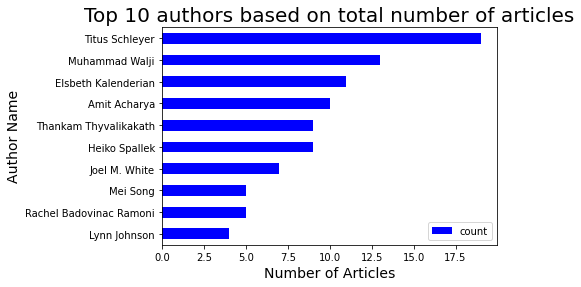

,name,count
2,T. Schleyer,19
34,M. Walji,13
25,E. Kalenderian,11
51,A. Acharya,10
15,T. Thyvalikakath,9
45,H. Spallek,9
33,Joel M. White,7
59,Mei Song,5
174,R. Ramoni,5
1,L. Johnson,4


In [3]:
#Plotting a graph for top 10 authors with the maximum number of articles published.
plotgraph=pd.read_csv("TopAuthors_csvfile_m.csv")
plotgraph.set_index("name",drop=True,inplace=True)
ax=plotgraph.plot.barh(color = 'Blue')
ax.invert_yaxis()
plt.title("Top 10 authors based on total number of articles",fontsize=20)
plt.xlabel("Number of Articles",fontsize=14)
plt.ylabel("Author Name",fontsize=14)
plt.savefig('Top_Authors.png',bbox_inches='tight',dpi=400)
plt.show()
plotgraph = df.nlargest(10, ['count'])[["name","count"]]
plotgraph

In [4]:
#Reading the author table for data analysis keep it
import pandas as pd
coauthordf = pd.read_csv("Author_info_withdoi_pubmed_collbration.csv")
coauthordf['authorId'] = coauthordf['authorId'].fillna(0).astype(int)
coauthordf

,Unnamed: 0,article_id,authorId,name,url,Rank
0,0,10.5455/aim.2012.20.47-55,6589245,Fedja Masic,https://www.semanticscholar.org/author/6589245,1.0
1,1,10.1177/154407370301700108,2107747571,L. Johnson,https://www.semanticscholar.org/author/2107747571,1.0
2,2,10.1177/154407370301700104,2169003,T. Schleyer,https://www.semanticscholar.org/author/2169003,1.0
3,3,10.1177/154407370301700103,2169003,T. Schleyer,https://www.semanticscholar.org/author/2169003,1.0
4,4,10.1177/154407370301700105,1690314,Dean F. Sittig,https://www.semanticscholar.org/author/1690314,1.0
...,...,...,...,...,...,...
528,528,PMCID:18487785,8981123,J. Psutka,https://www.semanticscholar.org/author/8981123,NaN
529,529,PMCID:27139408,32246566,J. Zvárová,https://www.semanticscholar.org/author/32246566,NaN
530,530,PMCID:27139408,3323317,K. Chleborad,https://www.semanticscholar.org/author/3323317,NaN
531,531,PMCID:27139408,3218479,K. Zvára,https://www.semanticscholar.org/author/3218479,NaN


In [ ]:
#Authors and co authors for all the articles. keep it
import numpy as np
group = coauthordf.groupby('article_id')
df2 = group.apply(lambda x: x['name'].unique())
df2 = df2.apply(pd.Series)
df2 = df2.replace(np.nan, '', regex=True)
df2.to_csv("AuthorCollaboration.csv")
df2

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
article_id,,,,,,,,,,,,,,,,,,,,,
10.1002/J.0022-0337.2002.66.5.TB03542.X,J. C. Atkinson,G. G. Zeller,C. Shah,,,,,,,,...,,,,,,,,,,
10.1002/J.0022-0337.2005.69.3.TB03927.X,L. Rajab,Z. Baqain,,,,,,,,,...,,,,,,,,,,
10.1002/J.0022-0337.2011.75.5.TB05086.X,Joel M. White,E. Kalenderian,P. Stark,Rachel L Ramoni,R. Vaderhobli,M. Walji,,,,,...,,,,,,,,,,
10.1002/J.0022-0337.2012.76.1.TB05241.X,T. Schleyer,T. Thyvalikakath,H. Spallek,Michael P. Dziabiak,L. Johnson,,,,,,...,,,,,,,,,,
10.1007/978-3-319-17272-9_9,E. Kalenderian,M. Walji,R. Ramoni,,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PMCID:25308567,E. Leonardi,A. Agocs,S. Fragkiskos,N. Kasfikis,J. Le Goff,M. Cristalli,V. Luzzi,A. Polimeni,,,...,,,,,,,,,,
PMCID:26034034,S. G. Reed,Shawn S. Adibi,Mullen Coover,R. Gellin,A. Wahlquist,Anitha AbdulRahiman,Lindsey H Hamil,M. Walji,P. O'Neill,E. Kalenderian,...,,,,,,,,,,
PMCID:26798898,D. T. Ford,,,,,,,,,,...,,,,,,,,,,
